In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import random
import json
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
path = r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\olp\\"
savepath = r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\plots\\"

dom = np.load("domains.npy", allow_pickle=True)
types = np.load("types.npy", allow_pickle=True)


auc_aa = np.load("20auc_aa.npy", allow_pickle=True) 
auc_prob = np.load("20auc_prob.npy", allow_pickle=True)
auc_pa = np.load("20auc_pa.npy", allow_pickle=True)
auc_emb = np.load("20auc_emb.npy", allow_pickle=True)
auc_olp = np.load("20auc_olp.npy", allow_pickle=True)
auc_jc = np.load("20auc_jc.npy", allow_pickle=True)
auc_gae = np.load("20auc_gae.npy", allow_pickle=True)
auc_dcsbm = np.load("20auc_dcsbm.npy", allow_pickle=True)
auc_mod = np.load("20auc_mod.npy", allow_pickle=True)
auc_spec = np.load("20auc_spec.npy", allow_pickle=True)



auc_aa_1 = np.load("auc_aa_wonan.npy", allow_pickle=True)
auc_prob_1 = np.load("auc_prob_wonan.npy", allow_pickle=True)
auc_pa_1 = np.load("auc_pa_wonan.npy", allow_pickle=True)
auc_emb_1 = np.load("auc_emb_wonan.npy", allow_pickle=True)
auc_olp_1 = np.load("auc_olp_wonan.npy", allow_pickle=True)
auc_jc_1 = np.load("auc_jc_wonan.npy", allow_pickle=True)
auc_gae_1 = np.load("auc_gae_wonan.npy", allow_pickle=True)
auc_dcsbm_1 = np.load("auc_dcsbm_wonan.npy", allow_pickle=True)
auc_mod_1 = np.load("auc_modularity_wonan.npy", allow_pickle=True)
auc_spec_1 = np.load("auc_spectral_wonan.npy", allow_pickle=True)




In [3]:
mylist = np.vstack((auc_aa_1, auc_prob_1, auc_pa_1, auc_emb_1, auc_jc_1, auc_dcsbm_1, auc_mod_1, auc_spec_1))

print(np.nanmean(mylist, axis =0))

[0.78476107 0.78233106 0.78453074 0.77704386 0.77051924 0.77659661
 0.78370012 0.78426108 0.78268008 0.78169456 0.77372159 0.78367705
 0.77993219 0.78377999 0.78114879 0.78638713 0.74319631 0.78464697
 0.77399246 0.78421246]


In [17]:

auc_methods = ['aa', 'n2v_dot_prod', 'pa', 'n2v_edge_emb', 'jc', 'dcsbm', 'mod', 'spec', 'olp']

auc_methods = ["Adamic-Adar", "Node2Vec Dot Product", "Preferential Attachment", "Node2Vec Edge Embedding",
              "Jaccard Coefficient", "MDL-DCSBM", "Modularity", "Spectral Clustering", "Top-Stacking"]



Biological_index = [i for i, x in enumerate(dom) if x == "Biological"]
Economic_index = [i for i, x in enumerate(dom) if x == "Economic"]
Informational_index = [i for i, x in enumerate(dom) if x == "Informational"]
Social_index = [i for i, x in enumerate(dom) if x == "Social"]
Technological_index = [i for i, x in enumerate(dom) if x == "Technological"]
Transportation_index = [i for i, x in enumerate(dom) if x == "Transportation"]

sampling_methods = ['RandomNodeSampler', 'DegreeBasedSampler', 'PageRankBasedSampler', 'RandomEdgeSampler',
 'RandomNodeEdgeSampler', 'HybridNodeEdgeSampler',
 'RandomEdgeSamplerWithInduction', 'DiffusionSampler',
 'ForestFireSampler',
 'NonBackTrackingRandomWalkSampler', 'LoopErasedRandomWalkSampler',
 'RandomWalkSampler', 'RandomWalkWithRestartSampler','MetropolisHastingsRandomWalkSampler', 'CirculatedNeighborsRandomWalkSampler', 'BreadthFirstSearchSampler',
 'DepthFirstSearchSampler', 'RandomWalkWithJumpSampler',
 'RandomNodeNeighborSampler', 'ShortestPathSampler']

print(len(sampling_methods))

20


(119,)
(9,)
(12,)
(74,)
(26,)
(10,)


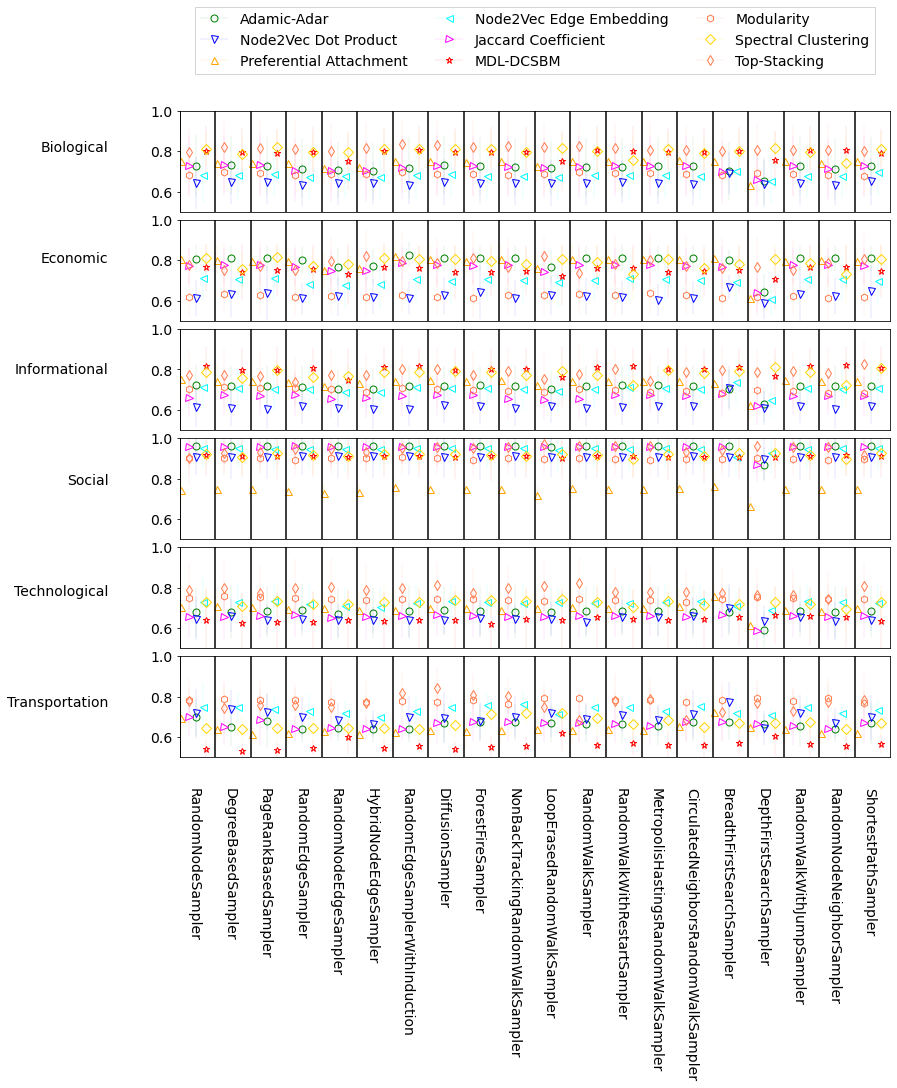

In [21]:
prefix = "fake"
symbol_list = ["o", "v","^","<",">", "*", "h", "D", "d", "1","2","3","4","s","p","P","*","h","H","+","x","X","D","d","."]

num_of_samps = len(sampling_methods)

params = {'legend.fontsize': 14,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

fig = plt.figure(figsize = (10.5,40))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.08, wspace=0.06)
plt.rcParams.update(params)

colors_list = ['green','blue','orange','cyan','magenta','red','coral', 'gold',
               'coral','navy','grey','black','pink','lavender',]

d_methods = auc_methods
ind1_sign = [-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1]


n_plt = -1 
location_plot = [1,2,3,4,5,6,7,8,9]

for theReg in types:
    
    if theReg == types[0]:
        idx = Biological_index
        #plt.ylim([0.5,0.8])
        #plt.yticks([0.5,0.8])
    elif theReg  ==types[1]:
        idx = Economic_index
    elif theReg == types[2]:
        idx = Informational_index
    elif theReg == types[3]:
        idx = Social_index
    elif theReg  ==types[4]:
        idx = Technological_index
    elif theReg == types[5]:
        idx = Transportation_index

#     start_k = [0, 1/num_of_samps,2/num_of_samps,3/num_of_samps,4/num_of_samps,5/num_of_samps,6/num_of_samps,
#                7/num_of_samps,8/num_of_samps,9/num_of_samps,10/num_of_samps,11/num_of_samps,12/num_of_samps,
#                13/num_of_samps,14/num_of_samps,15/num_of_samps,16/num_of_samps,17/num_of_samps,18/num_of_samps,
#                19/num_of_samps,20/num_of_samps] 
    
    
    start_k = []
    
    for i in range(num_of_samps):
        
        start_k.append(i/(num_of_samps))
    
    
    
    
    n_plt = n_plt + 1
    exec("plt.subplot(20,1,"+str(location_plot[n_plt])+")")

    plt.xlim([0,1])
    plt.xticks([])
    plt.ylim([0.5,1])
 
        
    for ct_id,Nc in enumerate(sampling_methods):

        #fake_data = prefix+s1+s2+s3



        for id_, auc_ in enumerate(auc_methods):

            if ct_id==0:
                
                if id_ in [0]:
                    avrg_auc = np.nanmean(auc_aa_1[idx][:,ct_id])
                    
                    print(auc_aa_1[idx][:,ct_id].shape)
                    sd = np.nanstd(auc_aa[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.7/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    
                    plt.plot(point_loc,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')

                
                elif id_ in [1]:                
                    avrg_auc = np.nanmean(auc_prob_1[idx][:,ct_id])
                    sd = np.nanstd(auc_prob[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.2/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(point_loc,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')

                elif id_ in [2]:
                    avrg_auc = np.nanmean(auc_pa_1[idx][:,ct_id])
                    sd = np.nanstd(auc_pa[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.3/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])

                    plt.plot(start_k[ct_id]+(0.3/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')

                elif id_ in [3]:
                    avrg_auc = np.nanmean(auc_emb_1[idx][:,ct_id])
                    sd = np.nanstd(auc_emb[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.4/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])

                    plt.plot(start_k[ct_id]+(0.4/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                            linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')


                elif id_ in [4]:
                    avrg_auc = np.nanmean(auc_jc_1[idx][:,ct_id])
                    sd = np.nanstd(auc_jc[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')


                elif id_ in [5]:
                    avrg_auc = np.nanmean(auc_dcsbm_1[idx][:,ct_id])
                    sd = np.nanstd(auc_dcsbm[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')

                elif id_ in [6]:
                    avrg_auc = np.nanmean(auc_mod_1[idx][:,ct_id])
                    sd = np.nanstd(auc_mod[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')

                elif id_ in [7]:
                    avrg_auc = np.nanmean(auc_spec_1[idx][:,ct_id])
                    sd = np.nanstd(auc_spec[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')
                    
#                 elif id_ in [8]:
#                     avrg_auc = np.mean(auc_gae_1[idx][:,ct_id])
#                     sd = np.std(auc_gae[idx][:,ct_id])
#                     point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
#                     plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
#                     plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
#                              linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
#                               label=d_methods[id_], markersize=7,fillstyle='none')

                elif id_ in [8]:
                    avrg_auc = np.nanmean(auc_olp_1[idx][:,ct_id])
                    sd = np.nanstd(auc_olp[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                              label=d_methods[id_], markersize=7,fillstyle='none')
                    
                    
                    
            else:
                if id_ in [0]:
                    avrg_auc = np.nanmean(auc_aa_1[idx][:,ct_id])
                    sd = np.nanstd(auc_aa_1[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.7/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    
                    plt.plot(point_loc,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                
                elif id_ in [1]:                
                    avrg_auc = np.nanmean(auc_prob_1[idx][:,ct_id])
                    sd = np.nanstd(auc_prob_1[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.2/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(point_loc,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                elif id_ in [2]:
                    avrg_auc = np.nanmean(auc_pa_1[idx][:,ct_id])
                    sd = np.nanstd(auc_pa_1[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.3/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])

                    plt.plot(start_k[ct_id]+(0.3/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                elif id_ in [3]:
                    avrg_auc = np.nanmean(auc_emb_1[idx][:,ct_id])
                    sd = np.nanstd(auc_emb_1[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.4/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])

                    plt.plot(start_k[ct_id]+(0.4/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                            linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                elif id_ in [4]:
                    avrg_auc = np.nanmean(auc_jc_1[idx][:,ct_id])
                    sd = np.nanstd(auc_jc[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')


                elif id_ in [5]:
                    avrg_auc = np.nanmean(auc_dcsbm_1[idx][:,ct_id])
                    sd = np.nanstd(auc_dcsbm[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                elif id_ in [6]:
                    avrg_auc = np.nanmean(auc_mod_1[idx][:,ct_id])
                    sd = np.nanstd(auc_mod[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

                elif id_ in [7]:
                    avrg_auc = np.nanmean(auc_spec_1[idx][:,ct_id])
                    sd = np.nanstd(auc_spec[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')

#                 elif id_ in [8]:
#                     avrg_auc = np.mean(auc_gae_1[idx][:,ct_id])
#                     sd = np.std(auc_gae[idx][:,ct_id])
#                     point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
#                     plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
#                     plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
#                              linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
#                              markersize=7,fillstyle='none')
                elif id_ in [8]:
                    avrg_auc = np.nanmean(auc_olp_1[idx][:,ct_id])
                    sd = np.nanstd(auc_olp[idx][:,ct_id])
                    point_loc = start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps
                    plt.plot([point_loc,point_loc],[avrg_auc+sd,avrg_auc-sd], linewidth=0.1,color=colors_list[id_])
                    plt.plot(start_k[ct_id]+(0.5/num_of_samps)+ind1_sign[id_]*0.25/num_of_samps,[avrg_auc], 
                             linewidth=0.1,color=colors_list[id_],marker = symbol_list[id_], 
                             markersize=7,fillstyle='none')
    
    for lll in range(0,20,1):
        plt.axvline(x=lll/20,color = 'k')




        
start_point = -0.05
angles = -90
increment = 0.05
for inc,s in enumerate(sampling_methods):        

    angle = -90
    plt.text(0.01 + inc*increment , 0.35, s,  verticalalignment='top' , fontsize=14,rotation=angle)


    
start_point = 0.01
increment = 0.55
for inc,s in enumerate(types):        

    angle = -90
    plt.text(-0.1, 3.5 - inc*increment , s,fontsize=14, horizontalalignment='right' )

    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 7.5),
          fancybox=False, shadow=False, ncol=3)
plt.savefig('fig1-fancy.pdf', bbox_inches='tight')
plt.show()
#plt.savefig('fig1-fancy.pdf', bbox_inches='tight')